<a href="https://colab.research.google.com/github/vamseeky/finance/blob/master/compoundreturns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
prices_spxt = [3769.44, 3821.6, 4278.66, 5212.76, 4984.22, 6553.57] #end of year index level of S&P500 total return index 2014 to 2019

In [11]:
prices_spxt[1:] #shows the elements from index 1 (note python starts at index 0)

[3821.6, 4278.66, 5212.76, 4984.22, 6553.57]

In [12]:
prices_spxt[:-1] #shows elements before the previous one

[3769.44, 3821.6, 4278.66, 5212.76, 4984.22]

In [62]:
#prices_spxt[1:]/prices_spxt[:1]-1 #this gives an error because python cannot divide arrays .. need to use numpy

TypeError: ignored

Using numpy can solve the problem of array operations

In [14]:
import numpy as np
prices_spxt_a = np.array(prices_spxt) #we are now converting python array into numpy array
prices_spxt_a

array([3769.44, 3821.6 , 4278.66, 5212.76, 4984.22, 6553.57])

In [15]:
prices_spxt_a[1:]/prices_spxt_a[:-1]-1 #now we should be able to see the yearly total returns of S&P500

array([ 0.0138376 ,  0.11959912,  0.21831601, -0.04384242,  0.31486371])

Using Pandas can help expand the capablities further

In [16]:
import pandas as pd
prices_spxt_df = pd.DataFrame(prices_spxt)
prices_spxt_df

,0
0,3769.44
1,3821.60
2,4278.66
3,5212.76
4,4984.22
5,6553.57


In [17]:
prices_spxt_df.pct_change() #using built-in % change function in pandas

,0
0,NaN
1,0.013838
2,0.119599
3,0.218316
4,-0.043842
5,0.314864


In [18]:
prices_spxt_df.iloc[1:].values/prices_spxt_df.iloc[:-1].values-1 #using iloc and values to calculate 

array([[ 0.0138376 ],
       [ 0.11959912],
       [ 0.21831601],
       [-0.04384242],
       [ 0.31486371]])

In [19]:
prices_spxt_df/prices_spxt_df.shift(1)-1 #using the shift() function

,0
0,NaN
1,0.013838
2,0.119599
3,0.218316
4,-0.043842
5,0.314864


Real World Exercise

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [37]:
prices_spxt_bbg = pd.read_csv('SPXTreturns.csv') #import csv file
prices_spxt_bbg = prices_spxt_bbg.set_index('Date') #reset the index value to first column using header
prices_spxt_bbg

,Index
Date,
12/29/89,379.41
1/31/90,353.94
2/28/90,358.50
3/30/90,368.00
4/30/90,358.81
...,...
8/30/19,5898.23
9/30/19,6008.59
10/31/19,6138.73


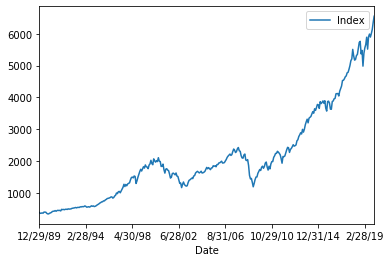

In [38]:
prices_spxt_bbg.plot() #plotting the data for visualization

In [41]:
monthly_rors = prices_spxt_bbg.pct_change() #calculating monthly returns
monthly_rors

,Index
Date,
12/29/89,NaN
1/31/90,-0.067131
2/28/90,0.012884
3/30/90,0.026499
4/30/90,-0.024973
...,...
8/30/19,-0.015841
9/30/19,0.018711
10/31/19,0.021659


In [48]:
monthly_rors.describe() #descriptive statistics

,Index
count,360.000000
mean,0.008795
std,0.041040
min,-0.167951
25%,-0.015717
50%,0.012946
75%,0.034101
max,0.114356


In [50]:
np.prod(monthly_rors+1)-1 #compounding the returns using numpy

Index    16.273056
dtype: float64

In [55]:
cum_ror = (monthly_rors+1).prod()-1 #componding using pandas
cum_ror

Index    16.273056
dtype: float64

In [61]:
ann_ror = (cum_ror+1)**(12/(prices_spxt_bbg.count()-1))-1 #annualizing the returns
ann_ror

Index    0.099628
dtype: float64